In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# create a dataset of images and flatten them
directory = 'generated_data'
dataset = np.array([cv2.cvtColor(cv2.imread(f'{directory}/{file}'), cv2.COLOR_BGR2GRAY)
                    for file in os.listdir(directory)])
dataset = np.reshape(dataset, (dataset.shape[0], 28 * 28))

# split our dataset into training and testing
train, test = train_test_split(dataset, test_size=0.25, random_state=0)

dataset.shape

(50000, 784)

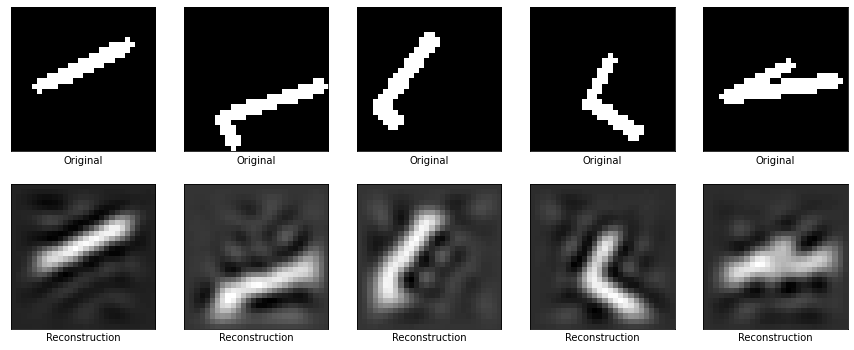

In [15]:
from sklearn.decomposition import PCA

# train a PCA algorithm and apply it to the test data
pca = PCA(n_components=50).fit(train)
reconstruction = pca.inverse_transform(pca.transform(test))
reconstruction = np.reshape(reconstruction, (test.shape[0], 28, 28))
original = np.reshape(test, (test.shape[0], 28, 28))

# show comparison between reconstruction and originals
plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original[i], cmap="gray")
    plt.xlabel('Original')
    plt.subplot(2,5,i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstruction[i], cmap="gray")
    plt.xlabel('Reconstruction')

plt.savefig('results/pca_reconstruction.png')
plt.show()